* Neural Network

* SVM

* Logisitc Regress

* Elastic Net Linear Regression

In [163]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [164]:
np.random.seed(0)

In [165]:
features_raw = pd.read_csv('features.csv')
features_raw.head()

,Unnamed: 0,score,+ve strand,length,longest A,longest C,longest G,longest T,As,Cs,...,pos_-0_GC,pos_-0_GG,pos_-0_GT,pos_-0_TA,pos_-0_TC,pos_-0_TG,dist prim 3',dist prim 5',dist snd 3',dist snd 5'
0,0,0.019320,1,24,1,1,2,2,0.142857,0.238095,...,0,0,0,0,0,0,0.479236,0.522723,0.480451,0.480486
1,1,0.348892,1,24,1,4,2,1,0.142857,0.476190,...,0,0,0,0,0,0,0.272874,0.311790,0.296377,0.295867
2,2,0.912409,1,24,1,3,2,1,0.095238,0.380952,...,0,0,0,0,0,1,0.264627,0.231069,0.266531,0.273686
3,3,0.997242,1,24,1,3,2,1,0.238095,0.238095,...,0,0,1,0,0,0,0.339376,0.284810,0.286465,0.296909
4,4,0.962154,1,24,1,3,3,2,0.047619,0.285714,...,0,1,0,0,0,0,0.511431,0.460201,0.366392,0.379641


In [166]:
scores_arr = features_raw['score'].to_numpy()
scores_arr[0:5]

array([0.01932036, 0.34889211, 0.91240883, 0.99724205, 0.96215413])

In [167]:
features_df = features_raw.drop(columns=['score', 'Unnamed: 0'])
features_arr = features_df.to_numpy()
features_arr[0:5, 0:5]

array([[ 1., 24.,  1.,  1.,  2.],
       [ 1., 24.,  1.,  4.,  2.],
       [ 1., 24.,  1.,  3.,  2.],
       [ 1., 24.,  1.,  3.,  2.],
       [ 1., 24.,  1.,  3.,  3.]])

In [168]:
# standardize the data to N(0,1)
scaler = StandardScaler()
scaler.fit(features_arr)
features_arr_std = scaler.transform(features_arr)

In [169]:
Xs_train = []
Ys_train = []

Xs_test = []
Ys_test = []

folds = KFold(n_splits=5, shuffle = True)

for train_index, test_index in folds.split(features_arr_std):
    Xs_train.append(features_arr_std[train_index])
    Ys_train.append(features_arr_std[train_index])
    
    Xs_train.append(features_arr_std[test_index])
    Ys_train.append(features_arr_std[test_index])
    
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [    0     1     2 ... 16361 16362 16363] TEST: [    7     9    12 ... 16354 16364 16365]
TRAIN: [    0     1     2 ... 16363 16364 16365] TEST: [    8    14    23 ... 16346 16349 16360]
TRAIN: [    0     1     2 ... 16363 16364 16365] TEST: [    5     6    15 ... 16350 16351 16358]
TRAIN: [    0     5     6 ... 16363 16364 16365] TEST: [    1     2     3 ... 16357 16361 16362]
TRAIN: [    1     2     3 ... 16362 16364 16365] TEST: [    0    13    21 ... 16353 16359 16363]


In [170]:
### CHECK STANDARDIZATION

# TODO

###

In [171]:
regr = ElasticNetCV(cv=5, random_state=0, max_iter=100000)
regr.fit(features_arr_std, scores_arr)
regr.coef_[0:5]

array([ 0.00363276, -0.00696065, -0.00757893, -0.        , -0.00230135])

In [172]:
regr.intercept_

0.4397719089383478

In [173]:
regr.score(features_arr_std, scores_arr)

0.21367314156788553

In [174]:
preds = regr.predict(features_arr_std)

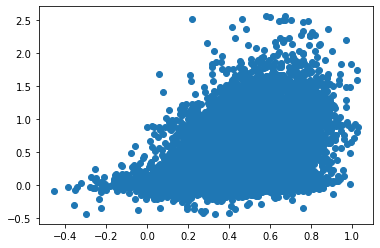

In [175]:
plt.scatter(preds, scores_arr)

In [176]:
mostNeg5 = np.argsort(regr.coef_)[0:5]
mostNeg5

array([475, 491,   5, 443,  96])

In [177]:
features_df.columns[mostNeg5]

Index(['pos_-1_GC', 'pos_-0_GC', 'longest T', 'pos_-3_GC', 'pos_-4_G'], dtype='object')

In [178]:
mostPos5 = np.argsort(regr.coef_)[-5:]
mostPos5

array([486, 106,  12, 497, 498])

In [179]:
features_df.columns[mostPos5]

Index(['pos_-0_CA', 'pos_-1_A', 'AG', 'dist prim 3'', 'dist prim 5''], dtype='object')

In [180]:
preds_bin = preds > 0.75
scores_bin = scores_arr > 0.75

In [181]:
np.sum(abs(preds_bin ^ scores_bin)) / len(preds_bin)

0.2461811071734083

In [182]:
fpr, tpr, thresholds = metrics.roc_curve(scores_bin, preds)

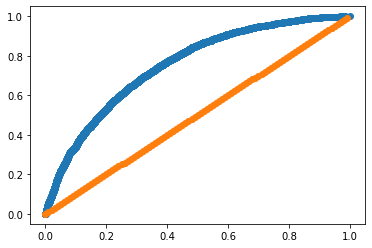

In [183]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(fpr, tpr)
ax1.scatter(np.arange(0,1,0.01), np.arange(0,1,0.01))
plt.show()

In [184]:
roc_auc_score(scores_bin, preds)

0.7533159767621014